## ARIMA 

Autoregressive Integrated Moving Average (ARIMA) is an econometrics model used particularly for time series. 

ARIMA is specially useful for non-stationary data, like ours, since it lets us apply an initial differencing step to remove it.

In [1]:
from pathlib import Path

project_dir = Path.cwd().parent

In [2]:
import pandas as pd

data_path=project_dir/'data'/'final_dataset.csv'

df=pd.read_csv(data_path,sep=';')

In [3]:
from statsmodels.tsa.arima_model import ARIMA

series = df['Close']
model = ARIMA(series, order=(5, 1, 0))
model_fit = model.fit(disp=0)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                 1986
Model:                 ARIMA(5, 1, 0)   Log Likelihood               -1707.417
Method:                       css-mle   S.D. of innovations              0.572
Date:                Mon, 10 Aug 2020   AIC                           3428.834
Time:                        12:46:13   BIC                           3467.991
Sample:                             1   HQIC                          3443.216
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0113      0.011      1.019      0.308      -0.010       0.033
ar.L1.D.Close    -0.0267      0.022     -1.189      0.235      -0.071       0.017
ar.L2.D.Close    -0.0361      0.022     

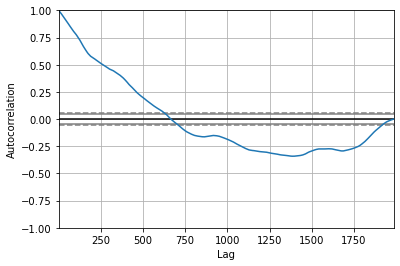

<Figure size 800x560 with 0 Axes>

In [4]:
# Plot auto-correlation

import matplotlib.pyplot as plt
from pandas.plotting import autocorrelation_plot

autocorrelation_plot(series)
plt.figure(figsize=(10, 7), dpi=80)
plt.show()

In [5]:
# Model with:
# - p(number of time lags) = 5
# - d(number of times the data have had past values subtracted) = 1
# - q(order of the moving-average model) = 0

from sklearn.metrics import mean_squared_error

X = series.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)

In [6]:
from sklearn.metrics import mean_squared_error

error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)

Test MSE: 0.517


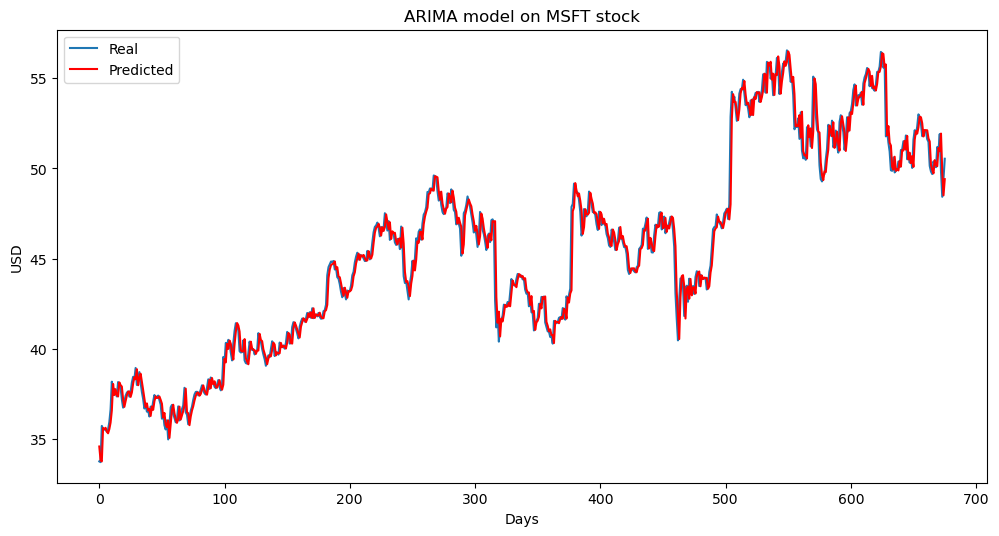

In [7]:
# Plot 'Real vs Predicted'

plt.figure(figsize=(12, 6), dpi=100)
plt.plot(test, label='Real')
plt.plot(predictions, color='red', label='Predicted')
plt.xlabel('Days')
plt.ylabel('USD')
plt.title('ARIMA model on MSFT stock')
plt.legend()
plt.show()